# Credit Card Customer Churn - Classification:


In [1]:
#required liberaries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

#preprocessing liberaries:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Modeling liberaries:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

#Evaluation Matrix:
from sklearn.metrics import roc_auc_score, f1_score,accuracy_score

sns.set(rc={'figure.figsize':(10,10)},font_scale=1.2)
warnings.filterwarnings('ignore')

## Reading Data:

In [2]:
df = pd.read_csv("BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
pd.set_option('display.max_columns',None)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## Data Info & Description:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [5]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


### Categorical Data Exploration:

In [6]:
df['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [7]:
df['Gender'].unique()

array(['M', 'F'], dtype=object)

In [8]:
df['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [9]:
df['Marital_Status'].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [10]:
df['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [11]:
df['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

## visualization analysis:

## Univariate Analysis:

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

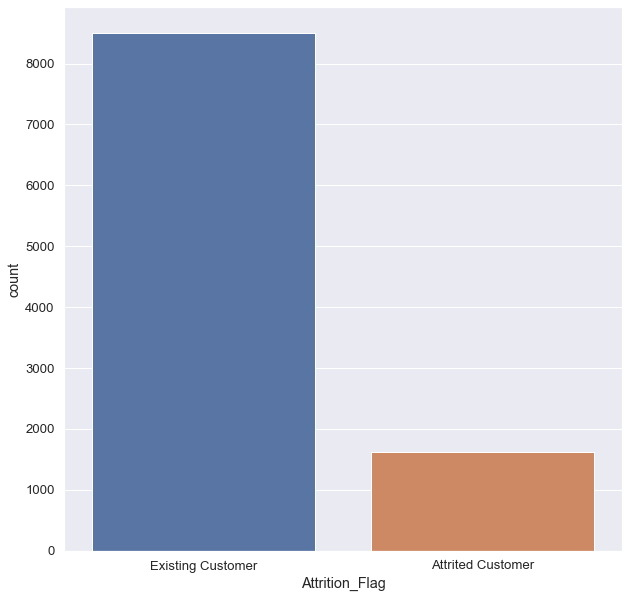

In [12]:
sns.countplot(df['Attrition_Flag'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

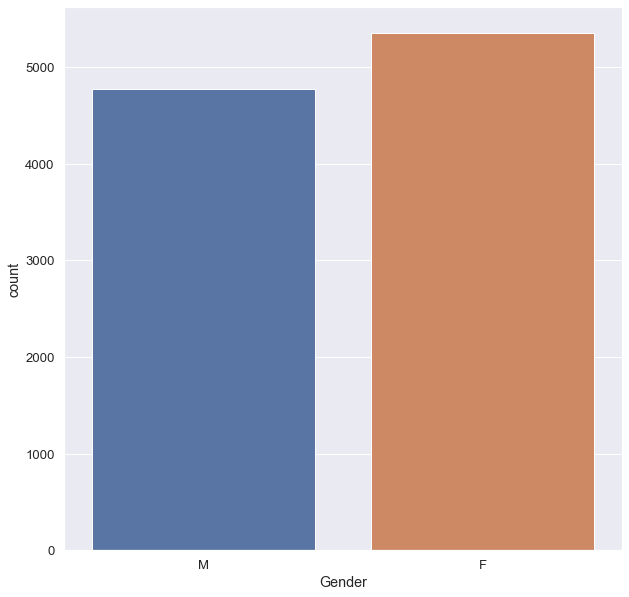

In [13]:
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

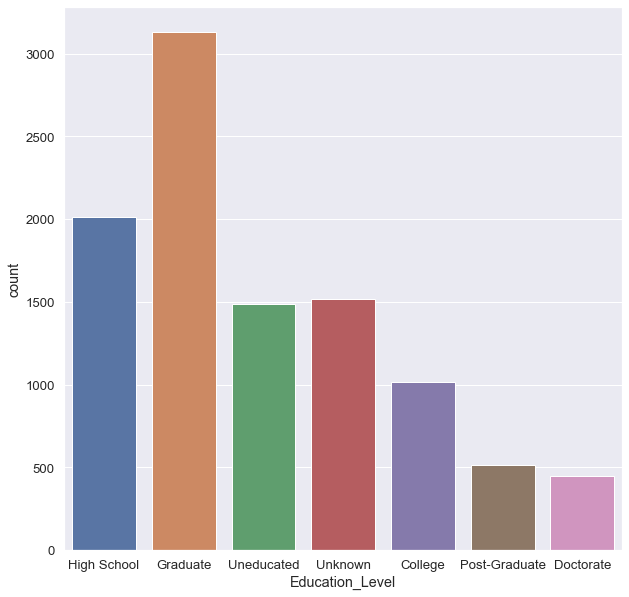

In [14]:
sns.countplot(df['Education_Level'])

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

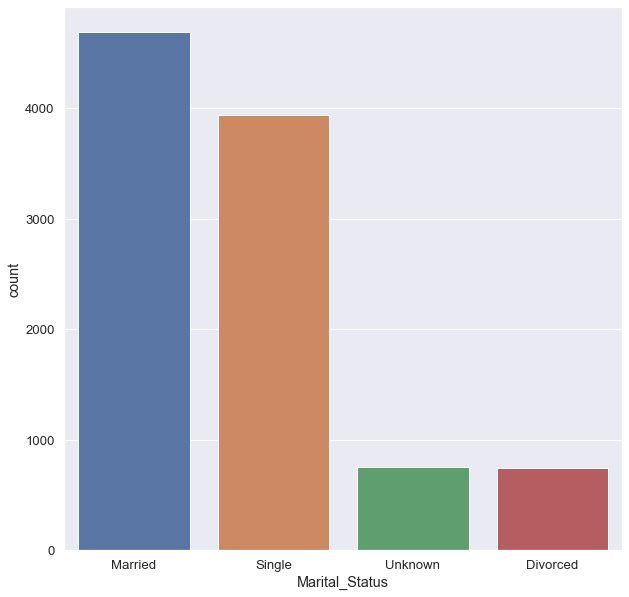

In [15]:
sns.countplot(df['Marital_Status'])

<AxesSubplot:xlabel='Income_Category', ylabel='count'>

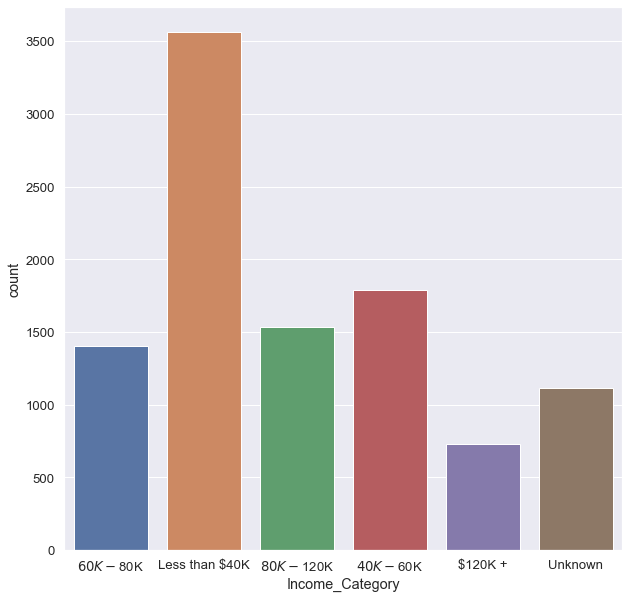

In [16]:
sns.countplot(df['Income_Category'])

<AxesSubplot:xlabel='Card_Category', ylabel='count'>

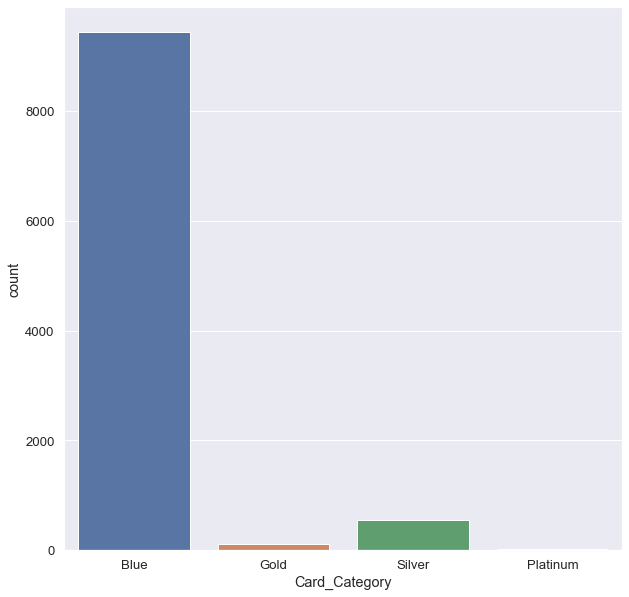

In [17]:
sns.countplot(df['Card_Category'])

## Bivariate Analysis:

<AxesSubplot:xlabel='Card_Category', ylabel='Dependent_count'>

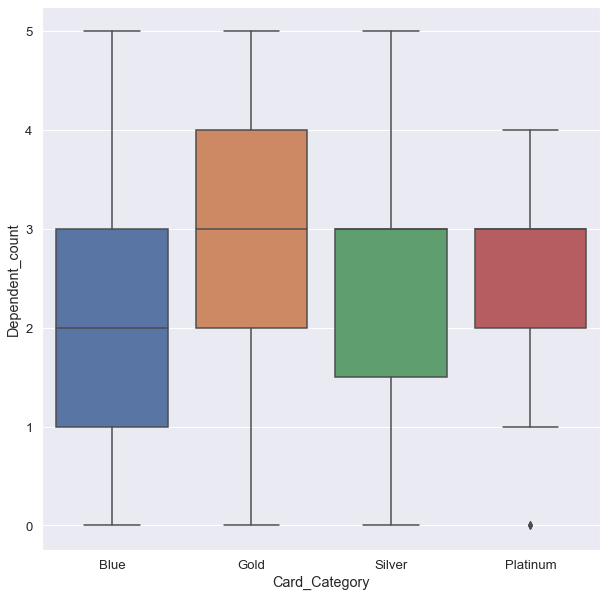

In [18]:
sns.boxplot(data=df, x='Card_Category',y='Dependent_count')

<AxesSubplot:xlabel='Income_Category', ylabel='Credit_Limit'>

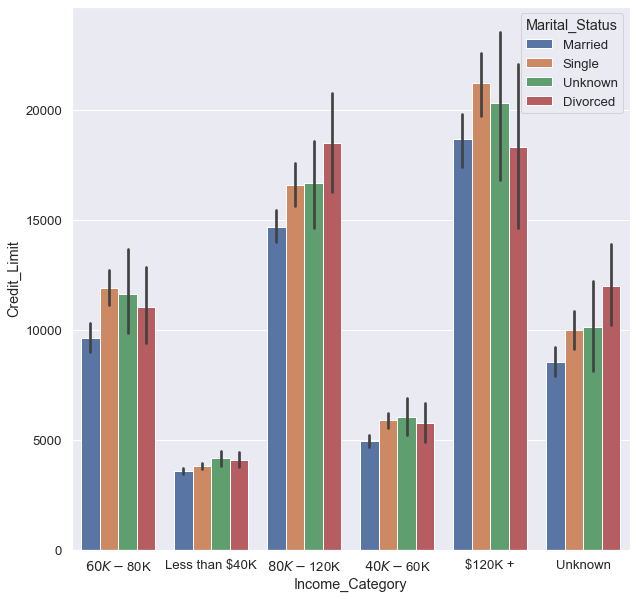

In [19]:
sns.barplot(data=df, x='Income_Category',y='Credit_Limit',hue='Marital_Status')

<AxesSubplot:xlabel='Avg_Open_To_Buy', ylabel='Total_Amt_Chng_Q4_Q1'>

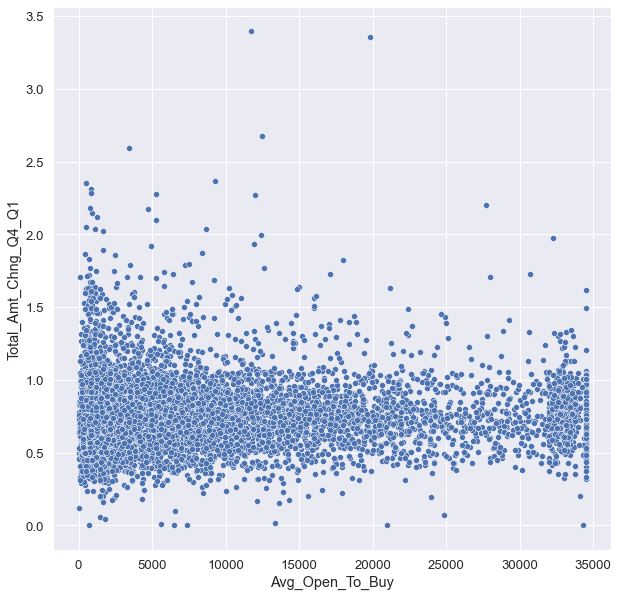

In [20]:
sns.scatterplot(data=df, x='Avg_Open_To_Buy',y='Total_Amt_Chng_Q4_Q1')

<AxesSubplot:xlabel='Total_Revolving_Bal', ylabel='Avg_Utilization_Ratio'>

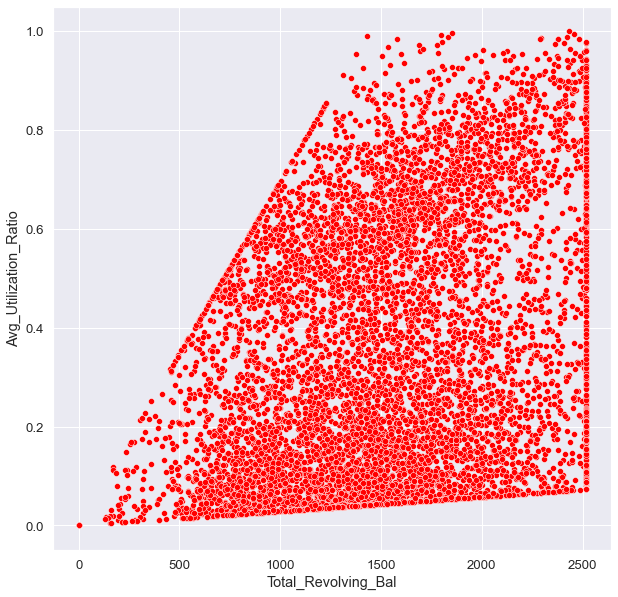

In [21]:
sns.scatterplot(data=df, x='Total_Revolving_Bal',y='Avg_Utilization_Ratio',color='red')

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'>

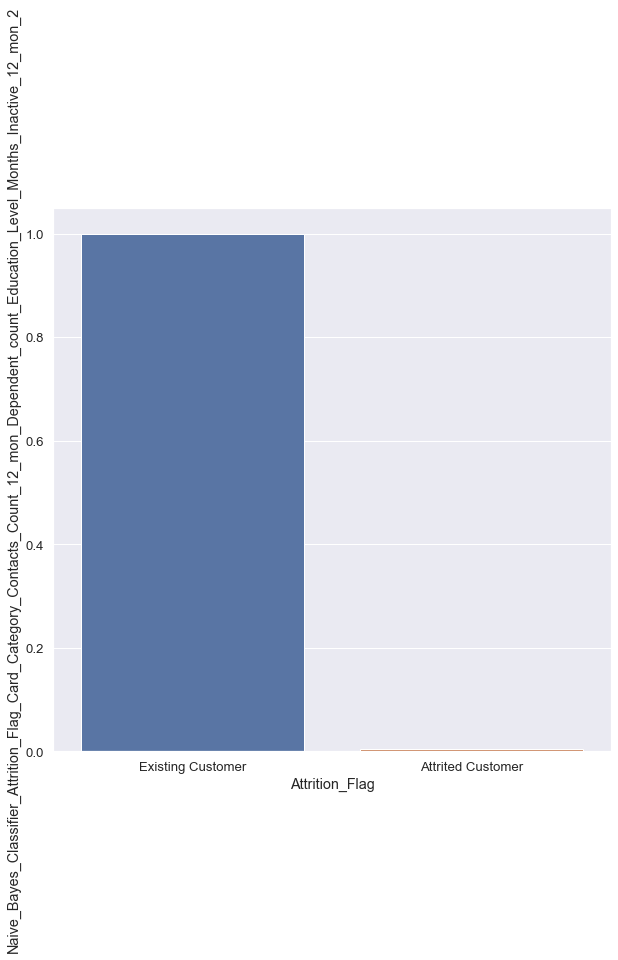

In [22]:
sns.barplot(data=df, y='Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',x='Attrition_Flag')

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'>

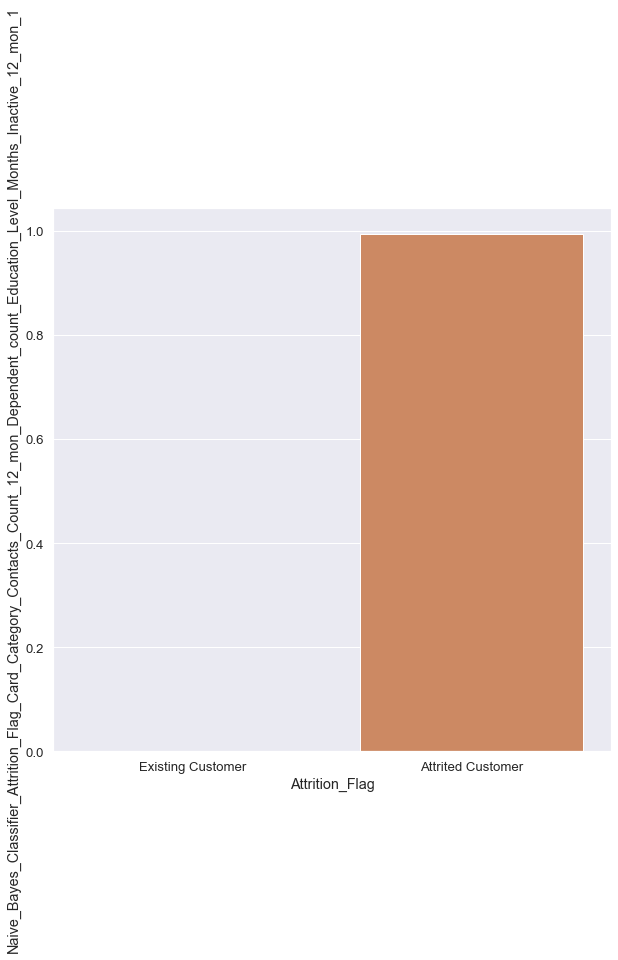

In [23]:
sns.barplot(data=df, x='Attrition_Flag',y='Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1')

<AxesSubplot:xlabel='Total_Relationship_Count', ylabel='Total_Trans_Amt'>

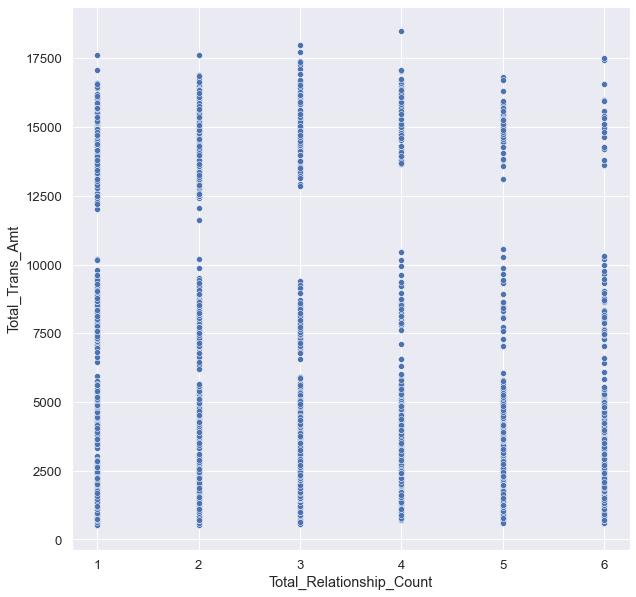

In [24]:
sns.scatterplot(data=df, x='Total_Relationship_Count',y='Total_Trans_Amt')


## Correlation :

<AxesSubplot:>

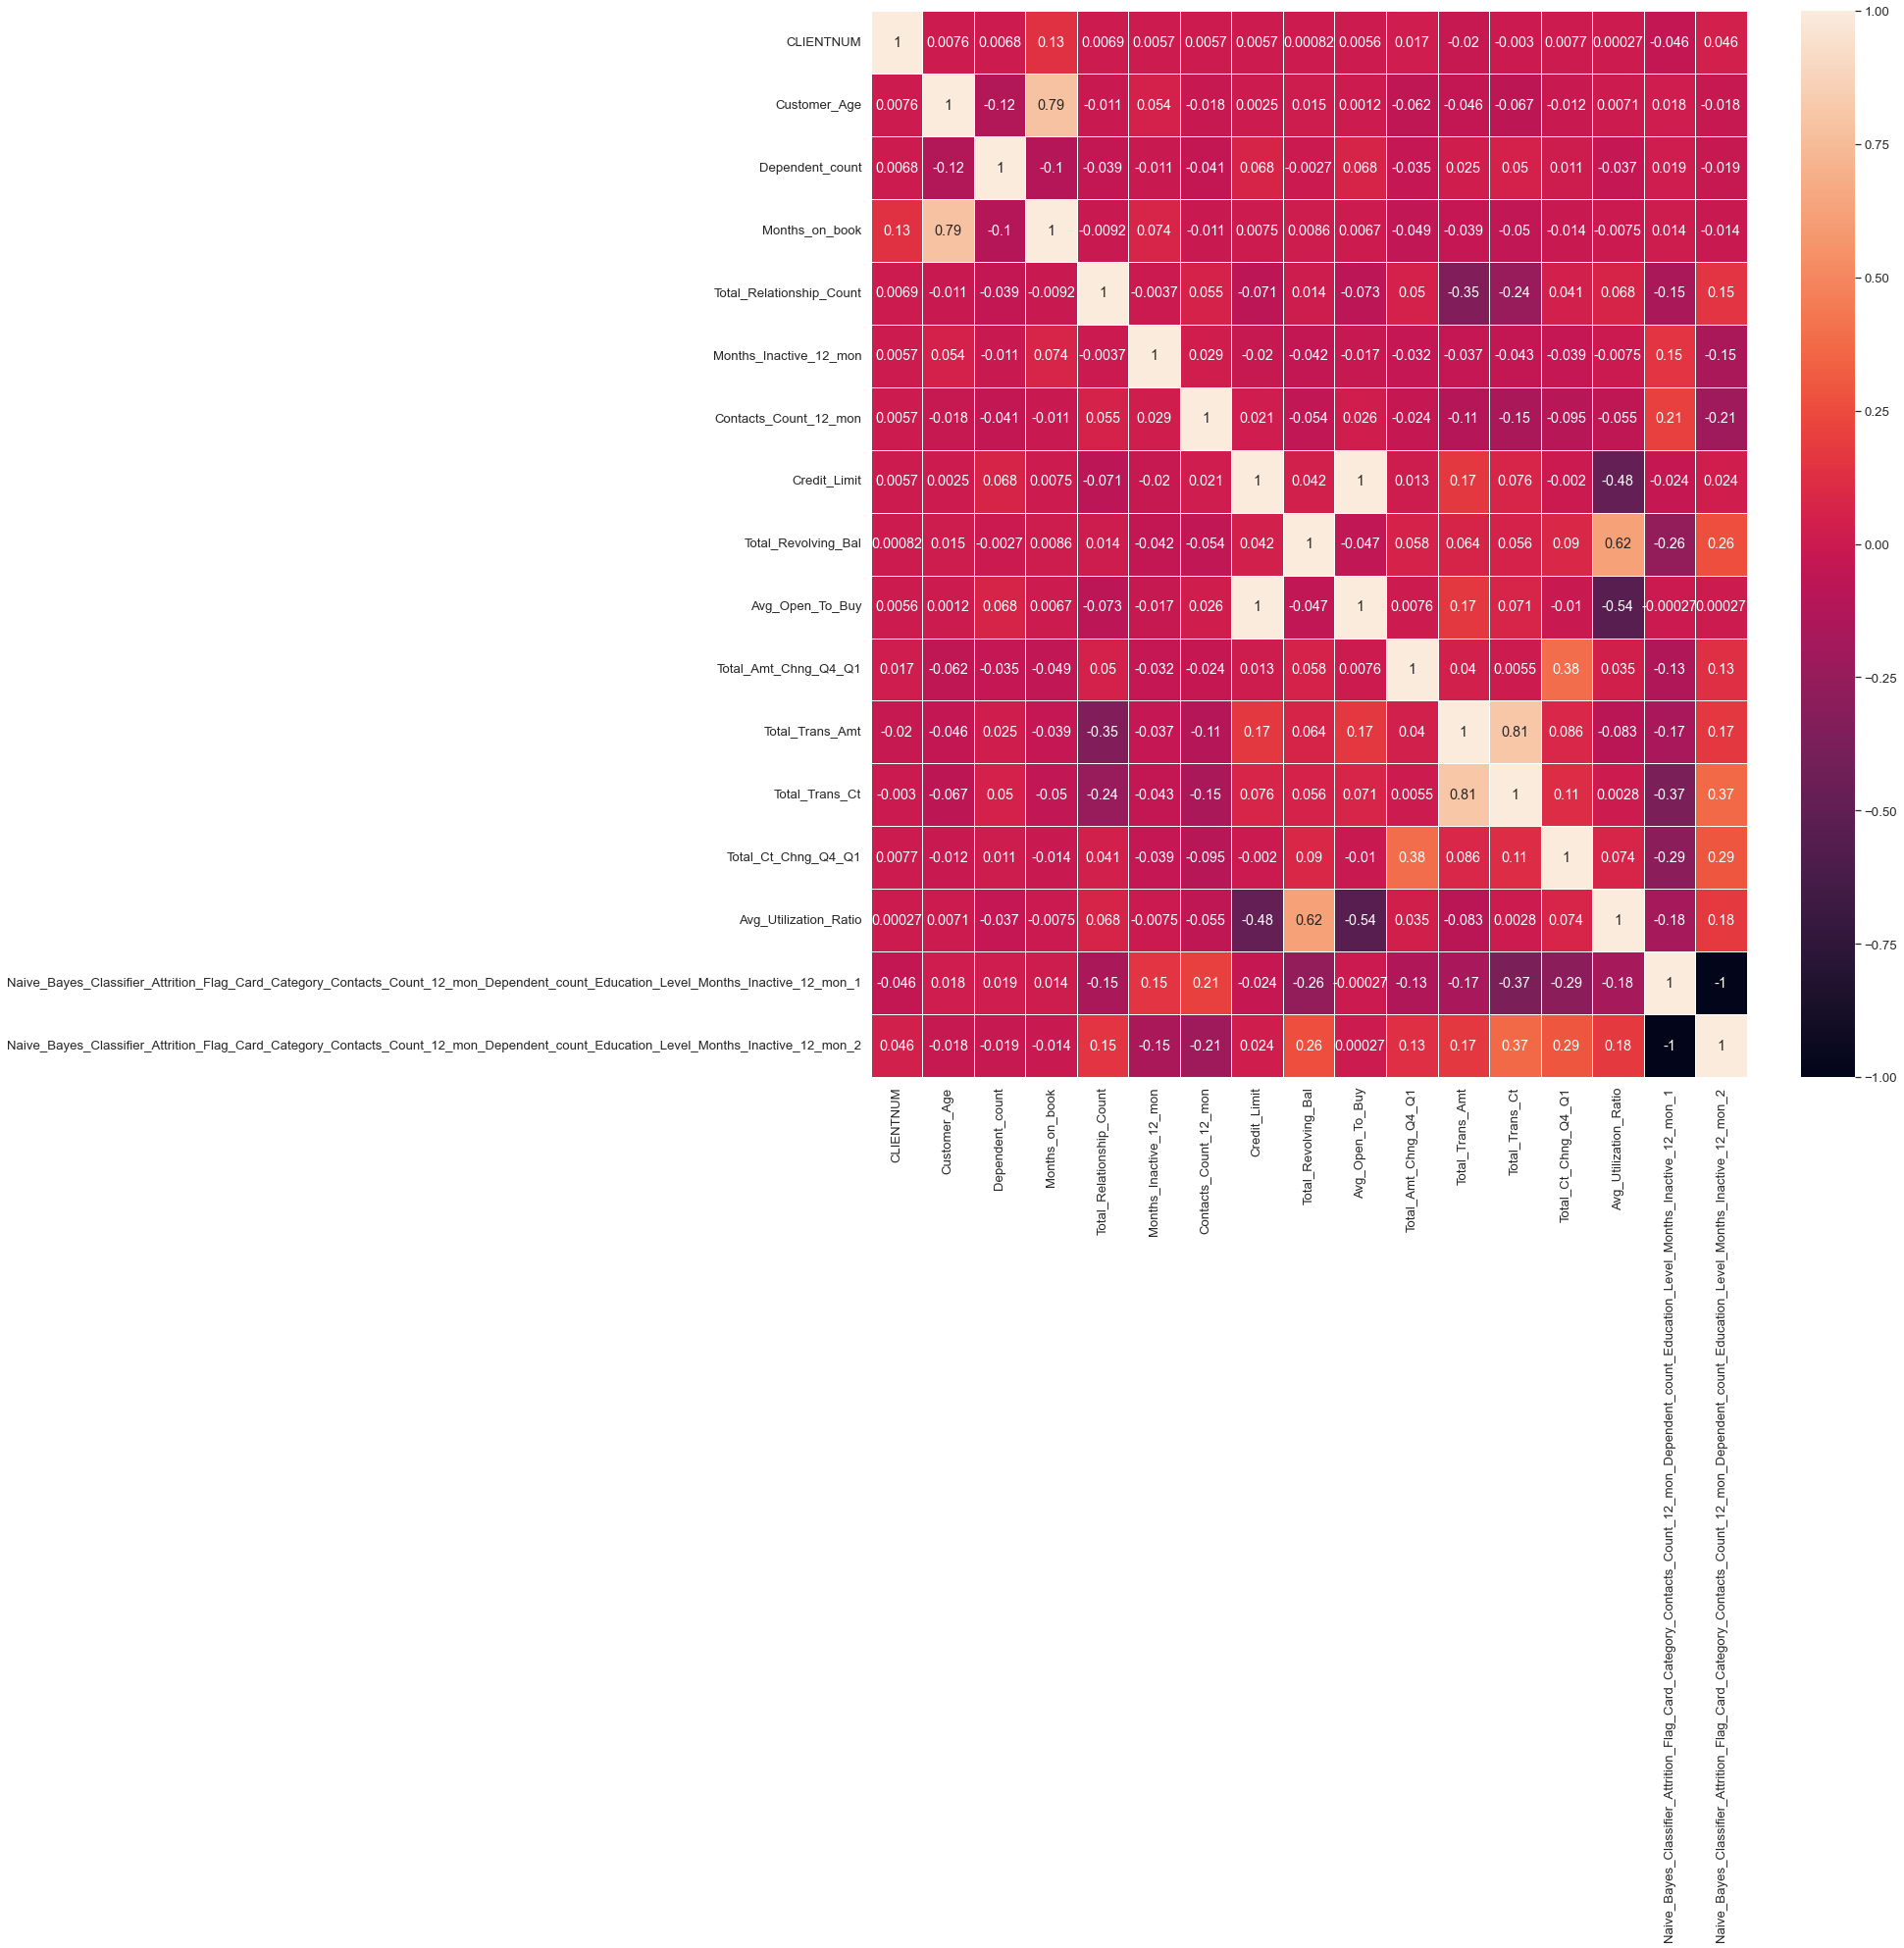

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, linewidth=1)

### Notes:
from correlation heatmap we find that most effective parameters are:
1. Customer Age
2. Avg_utilization_Ratio
3. Total_Revolving_Bal
4. Total_Trans_Amt
5. Total_Trans_Ct
6. Months_on_book

## Data Preprocessing:

In [26]:
attrition_map = {"Existing Customer":0, 'Attrited Customer':1}
df['Attrition_Flag'] = df['Attrition_Flag'].map(attrition_map)

In [27]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [28]:
gender_map = {'M':0, 'F':1}
df['Gender'] = df['Gender'].map(gender_map)

In [29]:
map_graduate = {'Unknown':0, 'Uneducated':1,'High School':2,'College':3,'Graduate':4,'Post-Graduate':5,'Doctorate':6}
df['Education_Level'] = df['Education_Level'].map(map_graduate)

In [30]:
df['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [31]:
df['Marital_Status'] = df['Marital_Status'].replace('Unknown',df['Marital_Status'].mode()[0])

In [32]:
map_status = {'Single':0,'Married':1,'Divorced':2}
df['Marital_Status'] = df['Marital_Status'].map(map_status)

In [33]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [34]:
df['Income_Category'] = df['Income_Category'].replace("Unknown",df['Income_Category'].mode()[0])

In [35]:
df['Income_Category'].value_counts()

Less than $40K    4673
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64

In [36]:
map_income = {'Less than $40K':0,'$40K - $60K':1,'$60K - $80K':2,'$80K - $120K':3,'$120K +':4}
df['Income_Category'] = df['Income_Category'].map(map_income)

In [37]:
df['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [38]:
map_card = {'Blue':0,'Silver':1,'Gold':2,'Platinum':3}
df['Card_Category'] = df['Card_Category'].map(map_card)

In [39]:
x = df.drop("Attrition_Flag", axis=1)
y = df['Attrition_Flag']

In [40]:
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x,y)

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

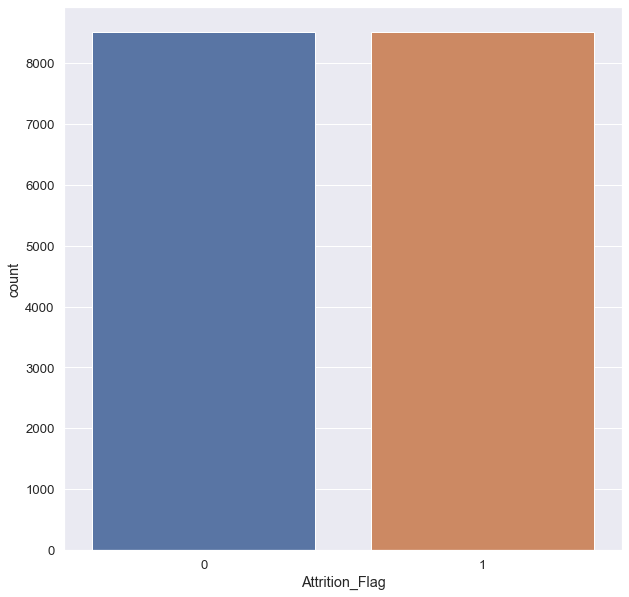

In [41]:
sns.countplot(data=y_smote, x=y_smote.index)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x_smote,y_smote, random_state=42, test_size=.33)

In [43]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [44]:
model1 = LogisticRegression()
model1.fit(x_train,y_train)
train_acc = model1.score(x_train,y_train)
test_acc = model1.score(x_test,y_test)
y_pred = model1.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)
roc = roc_auc_score(y_pred, y_test)
f1 = f1_score(y_pred,y_test)

print(f'Train Accuracy:{train_acc}')
print(f'Test Accuracy:{test_acc}')
print(f'Accuracy:{accuracy}')
print(f'F1 Score:{f1}')
print(f'ROC Score:{roc}')

Train Accuracy:1.0
Test Accuracy:1.0
Accuracy:1.0
F1 Score:1.0
ROC Score:1.0


In [45]:
model2 = KNeighborsClassifier()
model2.fit(x_train,y_train)
train_acc = model2.score(x_train,y_train)
test_acc = model2.score(x_test,y_test)
y_pred = model2.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)
roc = roc_auc_score(y_pred, y_test)
f1 = f1_score(y_pred,y_test)

print(f'Train Accuracy:{train_acc}')
print(f'Test Accuracy:{test_acc}')
print(f'Accuracy:{accuracy}')
print(f'F1 Score:{f1}')
print(f'ROC Score:{roc}')

Train Accuracy:1.0
Test Accuracy:1.0
Accuracy:1.0
F1 Score:1.0
ROC Score:1.0


In [46]:
model3 = DecisionTreeClassifier()
model3.fit(x_train,y_train)
train_acc = model3.score(x_train,y_train)
test_acc = model3.score(x_test,y_test)
y_pred = model3.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)
roc = roc_auc_score(y_pred, y_test)
f1 = f1_score(y_pred,y_test)

print(f'Train Accuracy:{train_acc}')
print(f'Test Accuracy:{test_acc}')
print(f'Accuracy:{accuracy}')
print(f'F1 Score:{f1}')
print(f'ROC Score:{roc}')

Train Accuracy:1.0
Test Accuracy:1.0
Accuracy:1.0
F1 Score:1.0
ROC Score:1.0


In [47]:
model4 =RandomForestClassifier()
model4.fit(x_train,y_train)
train_acc = model4.score(x_train,y_train)
test_acc = model4.score(x_test,y_test)
y_pred = model4.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)
roc = roc_auc_score(y_pred, y_test)
f1 = f1_score(y_pred,y_test)

print(f'Train Accuracy:{train_acc}')
print(f'Test Accuracy:{test_acc}')
print(f'Accuracy:{accuracy}')
print(f'F1 Score:{f1}')
print(f'ROC Score:{roc}')

Train Accuracy:1.0
Test Accuracy:1.0
Accuracy:1.0
F1 Score:1.0
ROC Score:1.0


In [48]:
model5 = GradientBoostingClassifier()
model5.fit(x_train,y_train)
train_acc = model5.score(x_train,y_train)
test_acc = model5.score(x_test,y_test)
y_pred = model5.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)
roc = roc_auc_score(y_pred, y_test)
f1 = f1_score(y_pred,y_test)

print(f'Train Accuracy:{train_acc}')
print(f'Test Accuracy:{test_acc}')
print(f'Accuracy:{accuracy}')
print(f'F1 Score:{f1}')
print(f'ROC Score:{roc}')

Train Accuracy:1.0
Test Accuracy:1.0
Accuracy:1.0
F1 Score:1.0
ROC Score:1.0


In [49]:
model6 = XGBClassifier()
model6.fit(x_train,y_train)
train_acc = model6.score(x_train,y_train)
test_acc = model6.score(x_test,y_test)
y_pred = model6.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)
roc = roc_auc_score(y_pred, y_test)
f1 = f1_score(y_pred,y_test)

print(f'Train Accuracy:{train_acc}')
print(f'Test Accuracy:{test_acc}')
print(f'Accuracy:{accuracy}')
print(f'F1 Score:{f1}')
print(f'ROC Score:{roc}')

Train Accuracy:1.0
Test Accuracy:1.0
Accuracy:1.0
F1 Score:1.0
ROC Score:1.0


In [50]:
model7 =SVC()
model7.fit(x_train,y_train)
train_acc = model7.score(x_train,y_train)
test_acc = model7.score(x_test,y_test)
y_pred = model7.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)
roc = roc_auc_score(y_pred, y_test)
f1 = f1_score(y_pred,y_test)

print(f'Train Accuracy:{train_acc}')
print(f'Test Accuracy:{test_acc}')
print(f'Accuracy:{accuracy}')
print(f'F1 Score:{f1}')
print(f'ROC Score:{roc}')

Train Accuracy:1.0
Test Accuracy:1.0
Accuracy:1.0
F1 Score:1.0
ROC Score:1.0
